In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
rcParams['figure.figsize'] = (12,6)

import numpy as np
import pandas as pd
import seaborn as sns

import os
import torch
from spiking_layer import *

In [2]:
num_layers = 1
num_neurons = 500
square_size = 50

In [3]:
net = SpikingNN(num_layers, num_neurons, square_size, (3, 5), num_timesteps=100)

In [4]:
inp = torch.rand((1, 1, 28, 28))
out = net(inp)

(100, 500) 0.00012


Text(0, 0.5, 'Activation over time')

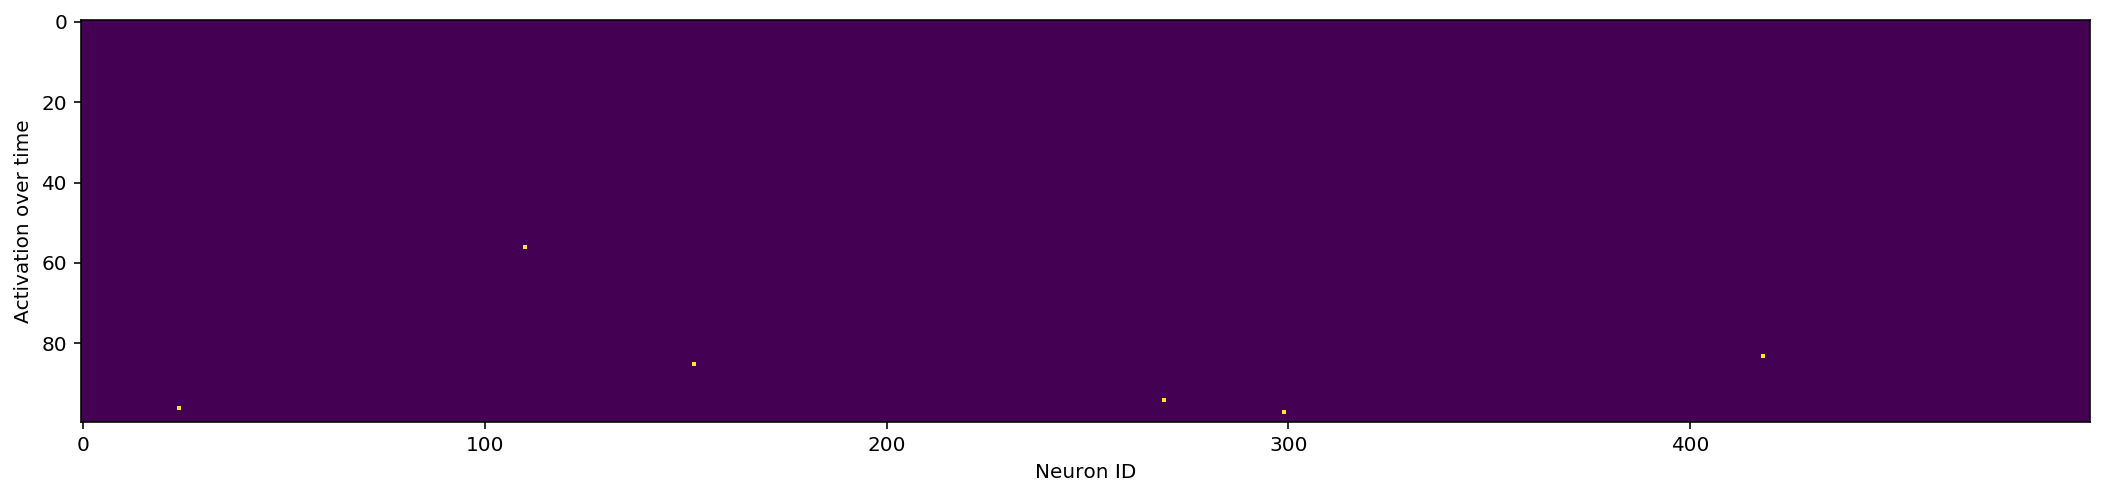

In [5]:
plt.figure(figsize=(18,9))
out = np.array(out)
print(out.shape, np.mean(out))
plt.imshow(out)
plt.xlabel('Neuron ID')
plt.ylabel('Activation over time')

In [6]:
l = net.layer[0]
vs = [n.v for n in l.nodes]
vs

[tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]),
 tensor([-65.]

In [7]:
net = SpikingNN(num_layers, 1500, square_size, (2, 4), num_timesteps=500)
inp = torch.rand((1, 1, 28, 28))
out = net(inp)

In [8]:
for n in net.layer[0].nodes:
    if np.isnan(n.v.item()):
        print("breaking")
        break

In [10]:
l = net.layer[0]
vs = [n.v for n in l.nodes]
for idx, v in enumerate(vs):
    if v > 30.0:
        print(idx)